## MASTER DATA SCIENCE: NUCLIO
## ALUMNA: Marina Ramiro

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [ ]:
#Leemos el fichero con los datos de BMW:
bmw = pd.read_csv('/content/drive/MyDrive/Data Science 2023 - NDS/03/Clases/Proyecto BMW/bmw_pricing_v2.csv')

### **1. Estructura de los datos:**

In [ ]:
bmw.shape

(4843, 18)

In [ ]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

- Observamos que  hay 4843 entradas, con 18 variables.
- También podemos ver que hay muchas variables con categoría 'object' que quizás deberían ser 'bolean'.
- Hay que transformar los datos de **'fecha_venta'** y **'fecha_registro'** de 'object' a 'datetime'.
- También habría que separar las fechas en 'año', 'mes', y 'dia' para observar la distribución de estos datos y plantear si se utiliza todo el timeline o algun periodo en concreto.

In [ ]:
bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
bmw.tail()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4838,BMW,218 Gran Tourer,39743.0,110.0,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01
4842,BMW,525,195840.0,160.0,2013-01-01,diesel,grey,NaN,True,True,False,False,True,False,True,True,15500.0,2018-09-01


- Hay muchas categorías 'object' que podrían ser booleanas ya que 
su contenido és True/False: **'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth' y 'alerta_lim_velocidad'**.
- Podríamos agrupar estas columnas en una de sola que fuera **'extras**', y que fuera una variable numérica que te indicase el número de extras que se han añadido al coche.

### **2. Eliminamos los duplicados (si es que hay):**

In [ ]:
bmw[bmw.duplicated(keep=False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


No hay duplicados.

### **3. Detección de nulos**

In [ ]:
bmw.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

- La mayoría de variables contienen algun nulo (a excepción de 'gps').
- Aún así, son pocas respecto al total de registros del dataset. De manera que podríamos eliminarlos todos.

In [ ]:
bmw0 = bmw.dropna()

In [ ]:
bmw0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4781 entries, 0 to 4841
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4781 non-null   object 
 1   modelo                       4781 non-null   object 
 2   km                           4781 non-null   float64
 3   potencia                     4781 non-null   float64
 4   fecha_registro               4781 non-null   object 
 5   tipo_gasolina                4781 non-null   object 
 6   color                        4781 non-null   object 
 7   tipo_coche                   4781 non-null   object 
 8   volante_regulable            4781 non-null   object 
 9   aire_acondicionado           4781 non-null   object 
 10  camara_trasera               4781 non-null   object 
 11  asientos_traseros_plegables  4781 non-null   object 
 12  elevalunas_electrico         4781 non-null   object 
 13  bluetooth         

- Al final hemos eliminado un 1.28% de los datos, que no son muchos.

### **4. Transformación de tipo de datos:**

**4.1. Tranformaremos aquellos elementos que sean 'object' True/False en 1/0:**

In [ ]:
for i in bmw0.select_dtypes(include='object').columns:
    print(i, set(bmw0[i].unique()) == set([True, False]))

marca False
modelo False
fecha_registro False
tipo_gasolina False
color False
tipo_coche False
volante_regulable True
aire_acondicionado True
camara_trasera True
asientos_traseros_plegables True
elevalunas_electrico True
bluetooth True
alerta_lim_velocidad True
fecha_venta False


In [ ]:
# Seleccionamos las columnas que queremos convertir (solo aquellas que contienen True/False)
object2int = [i for i in bmw0.select_dtypes(include='object').columns if set(bmw0[i].unique()) == set([True, False])]
object2int

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [ ]:
object2int.append('gps')
object2int

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad',
 'gps']

In [ ]:
for i in object2int:
    bmw0[i] = bmw0[i].astype(int)

<ipython-input-17-9ac660962cc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmw0[i] = bmw0[i].astype(int)


In [ ]:
bmw0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4781 entries, 0 to 4841
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4781 non-null   object 
 1   modelo                       4781 non-null   object 
 2   km                           4781 non-null   float64
 3   potencia                     4781 non-null   float64
 4   fecha_registro               4781 non-null   object 
 5   tipo_gasolina                4781 non-null   object 
 6   color                        4781 non-null   object 
 7   tipo_coche                   4781 non-null   object 
 8   volante_regulable            4781 non-null   int64  
 9   aire_acondicionado           4781 non-null   int64  
 10  camara_trasera               4781 non-null   int64  
 11  asientos_traseros_plegables  4781 non-null   int64  
 12  elevalunas_electrico         4781 non-null   int64  
 13  bluetooth         

- Añadir una variable **'extras'** que contenga la suma de todos los booleanos.
- Podriamos generar una versión simplificada del dataset sin los extras específicos.


In [ ]:
bmw1 = bmw0.copy()

In [ ]:
bmw1['extras'] = bmw1[['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']].sum(axis=1).astype(int)

In [ ]:
bmw1['extras'].value_counts()

3    902
4    832
5    794
2    644
6    603
1    450
7    376
8     97
0     83
Name: extras, dtype: int64

**4.2. Tranformaremos las fechas en unidades de tiempo:**

In [ ]:
for i in bmw1[['fecha_venta', 'fecha_registro']]:
  bmw1[i] = pd.to_datetime(bmw1[i])

In [ ]:
# Creamos una nueva variable indicativa del tiempo entre el registro del coche y la venta, con unidades de días:
bmw1['dif_venta_reg'] = ((bmw1['fecha_venta'] - bmw1['fecha_registro'])/np.timedelta64(1,'D')).astype(int)
bmw1['dif_venta_reg']

0       2161
1        671
2       2132
3       1311
4       1217
        ... 
4837    1004
4838    1035
4839    1157
4840    1066
4841     883
Name: dif_venta_reg, Length: 4781, dtype: int64

In [ ]:
bmw2 = bmw1.copy()

In [ ]:
# Transformamos las fechas en nuevas columnas de 'nombredia', 'dia', 'mes', 'año':
for i in ['fecha_venta', 'fecha_registro']:
    bmw2[i + '_nombredia'] = bmw2[i].dt.day_name()
    ##O .dt.weekday_name
    bmw2[i + '_dia'] = bmw2[i].dt.day
    bmw2[i + '_mes'] = bmw2[i].dt.month
    bmw2[i + '_año'] = bmw2[i].dt.year
   
    del bmw2[i]

### **5. Análisis univariable**

In [ ]:
for i in bmw2.columns:
    print('\033[1m' + i + '\033[0m', bmw2[i].unique(), '\n')

marca ['BMW'] 

modelo ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' ' Active Tourer'
 '225 Active Tourer' '214 Gran Tourer'] 

km [140411.  13929. 183297. ...  49832.  19633.  27920.] 

potencia [100. 317. 120. 135. 160. 225. 145. 105. 125. 130. 270. 110. 140. 180.
  85. 190. 236. 240. 250. 230. 309. 170. 142. 155. 210. 122. 200.  90.
 150. 141. 173. 137. 280. 1

In [ ]:
for i in bmw2.columns:
    print('\033[1m' + i + '\033[0m', bmw2[i].value_counts(), '\n')

marca BMW    4781
Name: marca, dtype: int64 

modelo 320                737
520                624
318                552
X3                 437
116                356
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 

km 129214.0    2
187698.0    2
94829.0     2
120833.0    2
167205.0    2
           ..
138489.0    1
85814.0     1
206362.0    1
132357.0    1
27920.0     1
Name: km, Length: 4725, dtype: int64 

potencia 135.0    867
120.0    777
85.0     625
100.0    558
105.0    441
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: potencia, Length: 61, dtype: int64 

tipo_gasolina diesel           4576
petrol            189
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64 

color black     1614
grey      1162
blue       699
white      526
brown      340
silver     324
red   

**'marca':**

- Observamos que solo hay un elemento para 'marca', cosa normal al tratarse de un dataset de BMW. A posteriori podemos eliminar esta columna ya que no nos aportará información relevante. 

**'modelo':**

In [ ]:
bmw2['modelo'].value_counts().sort_values(ascending=False)

320                737
520                624
318                552
X3                 437
116                356
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [ ]:
counts_modelo = bmw2['modelo'].value_counts()
print(counts_modelo[counts_modelo>48])
print(counts_modelo[counts_modelo<48])

320                 737
520                 624
318                 552
X3                  437
116                 356
X1                  273
316                 231
X5                  231
525                 181
530                 157
118                 141
318 Gran Turismo     97
320 Gran Turismo     73
518                  66
Name: modelo, dtype: int64
X4                 46
535                45
X6                 44
420                41
120                36
                   ..
M135                1
225                 1
i8                  1
630                 1
214 Gran Tourer     1
Name: modelo, Length: 62, dtype: int64


- Obervamos que solo hay 14/76 modelos que tengan más de 48 regístros (~1% de los datos), de manera que podríamos crear una categória de 'Otros modelos' para agrupar a los demás. 
- a) También observamos que hay modelos que deberíamos agrupar juntos p.e.: "320" y "320 Gran Turismo". Podríamos plantearnos separar la información de 'modelo' separando a través de la 'space bar', juntando aquellos que compartan un mismo número, y eliminar la parte que contenga letras.
- b) Otra manera de agrupar los BMWs según su modelo seria utilizando la designación de modelo del fabricante, ya que proporciona información sobre la serie (1r número), la carrocería, el motor (2º número) y la versión de cada vehículo (3r número), lo que seria útil para su comparación. En esta alternativa nos plantearíamos generar nuevas variables a partir de estos números. Pero de momento no lo haremos.

**'fecha_registro'+ 'fecha venta':**

In [ ]:
for i in bmw2.columns:
    if 'fecha' in i:
        print('\033[1m' + i + '\033[0m', bmw2[i].value_counts(), '\n')

fecha_venta_nombredia Thursday     1217
Sunday       1216
Tuesday       806
Friday        597
Wednesday     522
Saturday      220
Monday        203
Name: fecha_venta_nombredia, dtype: int64 

fecha_venta_dia 1    4781
Name: fecha_venta_dia, dtype: int64 

fecha_venta_mes 5    806
3    728
4    684
6    598
7    533
8    521
2    488
9    220
1    203
Name: fecha_venta_mes, dtype: int64 

fecha_venta_año 2018    4777
2007       1
2010       1
2009       1
2008       1
Name: fecha_venta_año, dtype: int64 

fecha_registro_nombredia Tuesday      769
Saturday     724
Sunday       694
Friday       684
Monday       678
Thursday     631
Wednesday    601
Name: fecha_registro_nombredia, dtype: int64 

fecha_registro_dia 1    4781
Name: fecha_registro_dia, dtype: int64 

fecha_registro_mes 3     463
1     452
10    448
7     446
6     443
5     435
9     416
4     405
2     391
11    342
8     332
12    208
Name: fecha_registro_mes, dtype: int64 

fecha_registro_año 2013    1520
2014    1272
2012

- La mayoría de **'fecha_ventas_año'** se encuentran en 2018 (está sobrerrepresentado). Convendría eliminar la columna.
- En **'fecha_venta_mes'** podemos ver faltan registros de 4 meses(Mayo, Setiembre-Diciembre). Cabria la posibilidad de generar un modelo sesgado si no lo eliminamos, epro de momento lo vamos a mantener.  
- **'fecha_registro_dia'** y **'fecha_ventas_dia'** solo contienen un valor, así que también pueden eliminarse.

**'tipo_gasolina':**

- Habria que juntar 'diesel' y 'Diesel'.
- La categoría 'diesel' se encuentra sobrerepresentada con un 95.73% de los datos (4636/4843). Quizás plantearnos eliminar la categoría 'tipo_gasolina'.

**'color':**

- Podemos juntar en categoría 'Otros colores': red, beige, green y orange. 

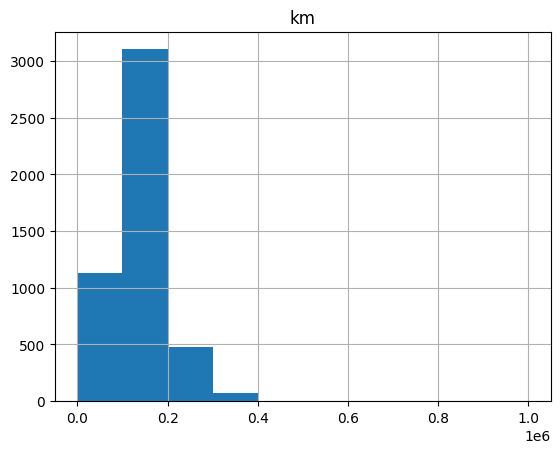

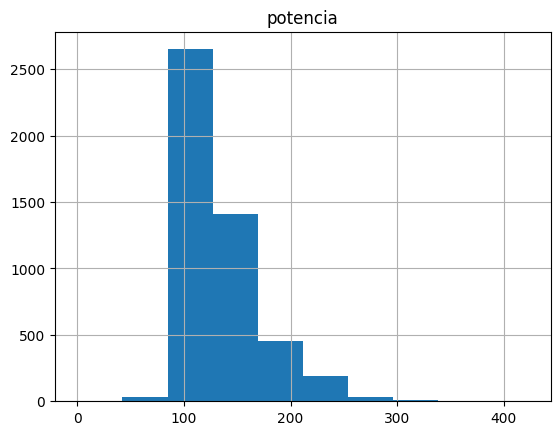

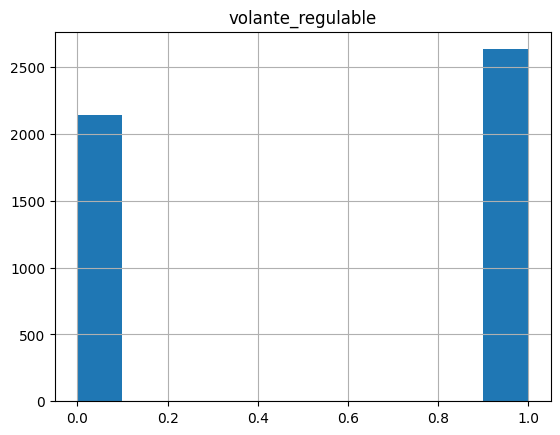

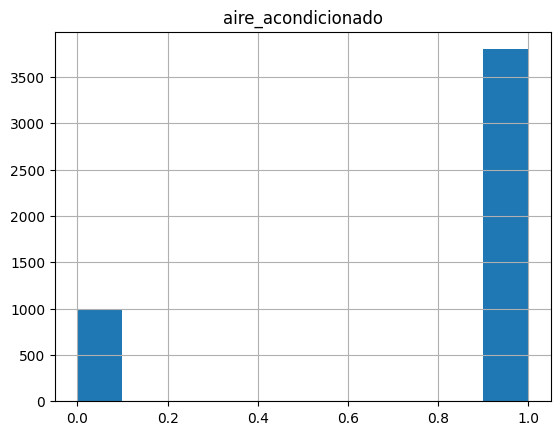

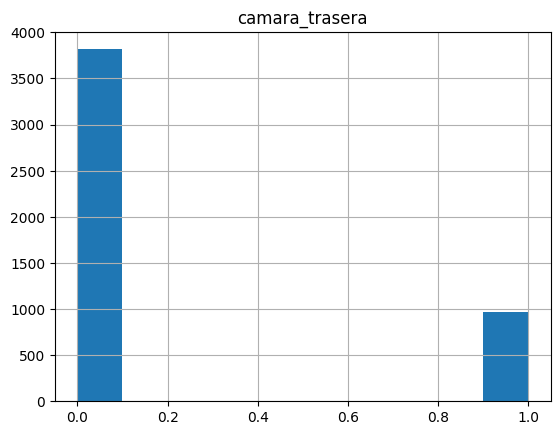

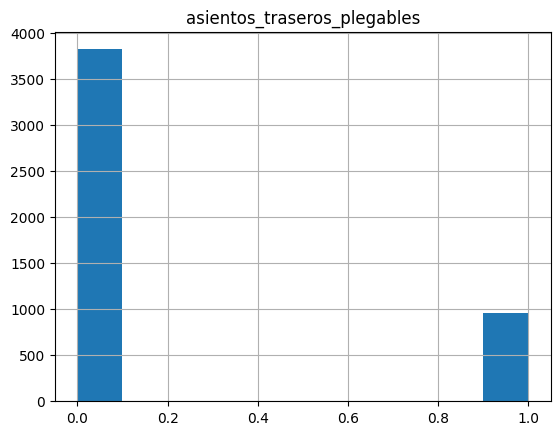

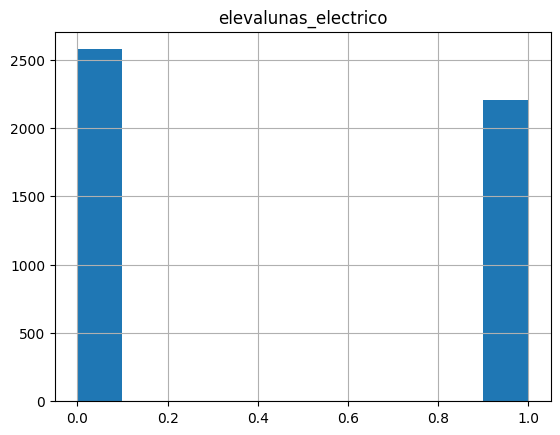

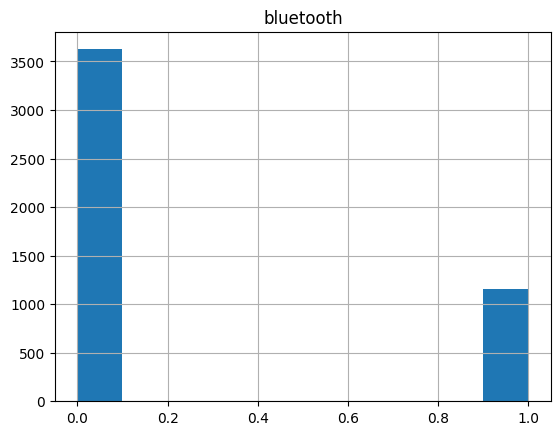

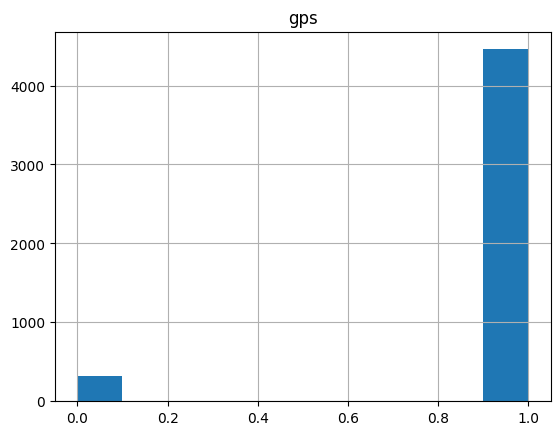

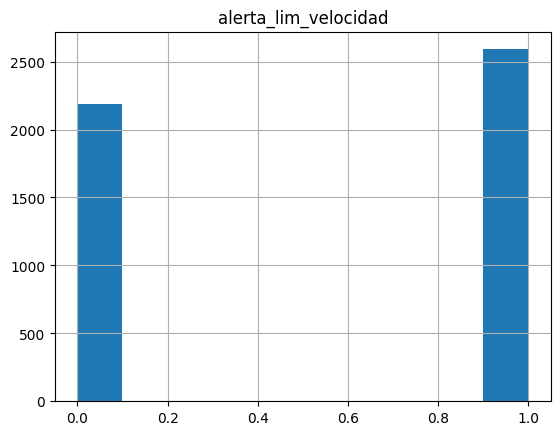

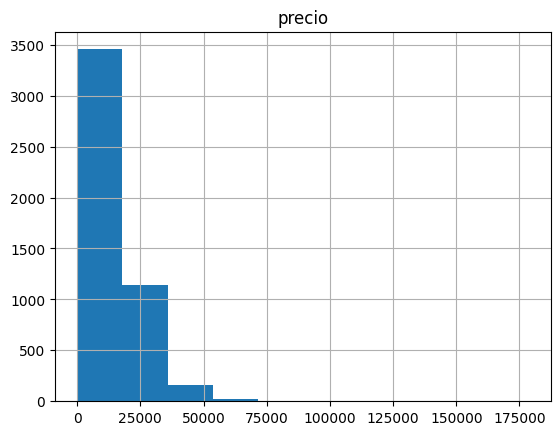

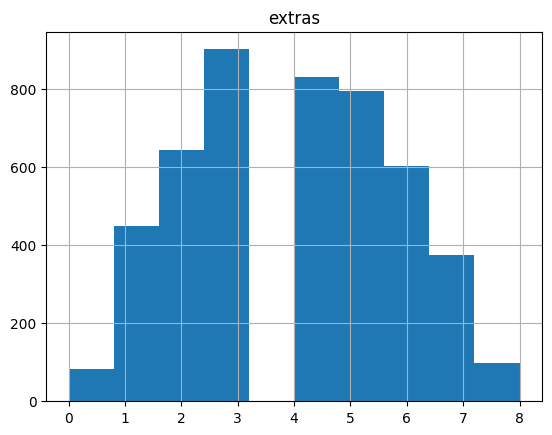

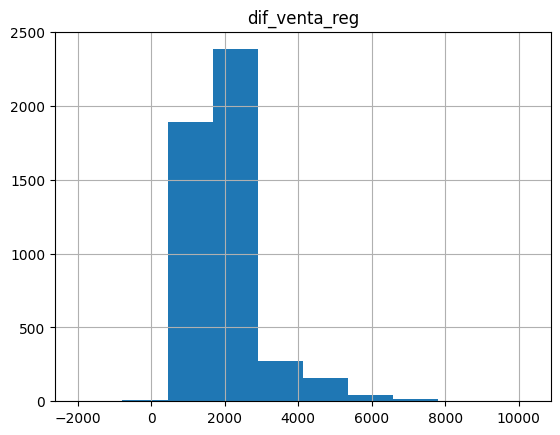

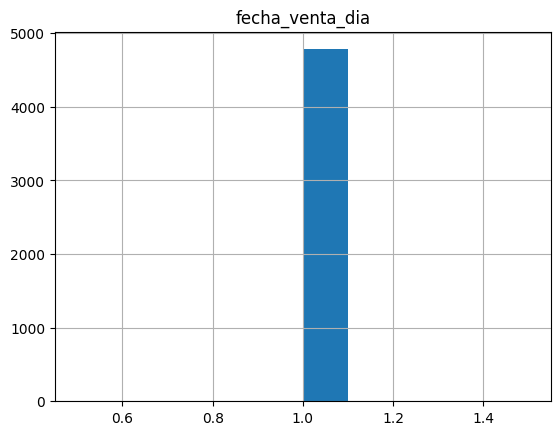

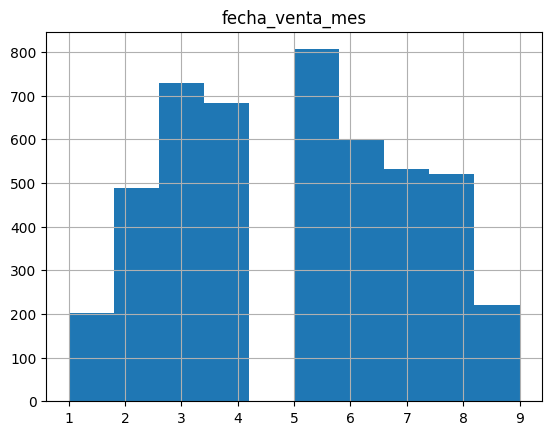

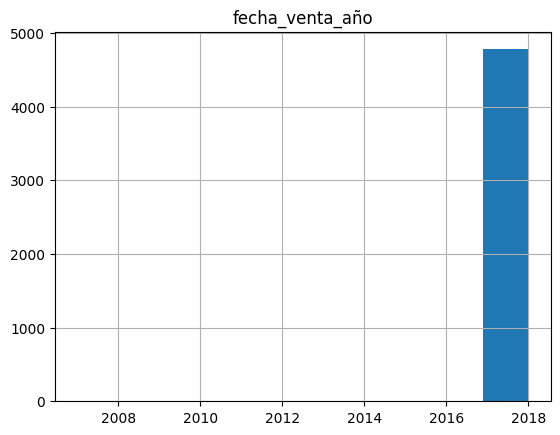

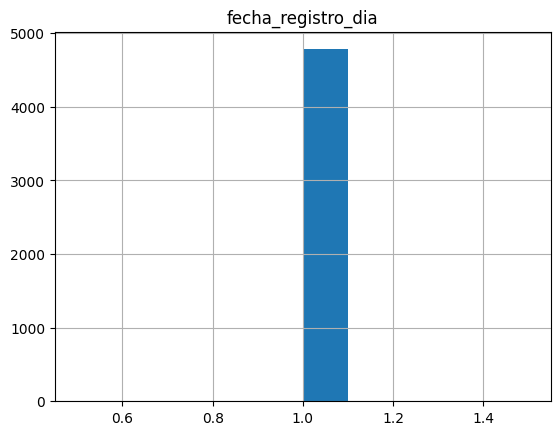

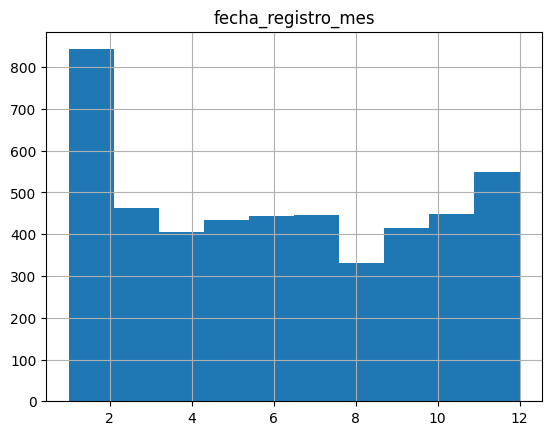

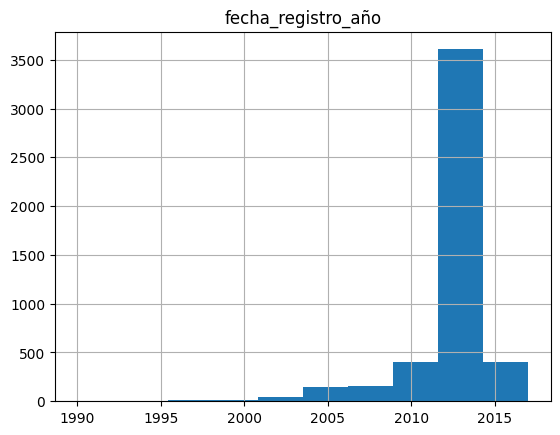

In [ ]:
for i in bmw2:
    if  bmw2[i].dtype.kind=="f" or bmw2[i].dtype.kind=="i":
        bmw2.hist(column=i)

**'precio':**

In [ ]:
bmw2[bmw2['precio'] == 0]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,extras,dif_venta_reg,fecha_venta_nombredia,fecha_venta_dia,fecha_venta_mes,fecha_venta_año,fecha_registro_nombredia,fecha_registro_dia,fecha_registro_mes,fecha_registro_año


In [ ]:
len(bmw2[bmw2['precio'] < 1000])

57

In [ ]:
bmw2[bmw2['precio'] < 1000]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,extras,dif_venta_reg,fecha_venta_nombredia,fecha_venta_dia,fecha_venta_mes,fecha_venta_año,fecha_registro_nombredia,fecha_registro_dia,fecha_registro_mes,fecha_registro_año
165,BMW,320,209208.0,135.0,diesel,black,estate,0,0,0,...,1,1643,Sunday,1,4,2018,Tuesday,1,10,2013
170,BMW,320,146639.0,135.0,diesel,silver,estate,0,1,0,...,3,1278,Sunday,1,4,2018,Wednesday,1,10,2014
171,BMW,316,159983.0,85.0,diesel,grey,estate,0,0,0,...,1,1796,Sunday,1,4,2018,Wednesday,1,5,2013
187,BMW,320,101013.0,120.0,diesel,blue,estate,0,1,0,...,3,1338,Tuesday,1,5,2018,Monday,1,9,2014
197,BMW,320,165516.0,135.0,diesel,blue,estate,0,0,0,...,1,1946,Tuesday,1,5,2018,Tuesday,1,1,2013
202,BMW,318,170164.0,105.0,diesel,grey,estate,0,1,0,...,3,1096,Tuesday,1,5,2018,Friday,1,5,2015
213,BMW,330,127461.0,190.0,diesel,silver,estate,0,1,0,...,3,1550,Tuesday,1,5,2018,Saturday,1,2,2014
222,BMW,318,147097.0,105.0,diesel,black,estate,0,0,0,...,1,1765,Thursday,1,3,2018,Wednesday,1,5,2013
245,BMW,320,150969.0,135.0,diesel,blue,estate,0,0,0,...,1,2192,Monday,1,1,2018,Sunday,1,1,2012
327,BMW,525,130500.0,160.0,diesel,silver,estate,0,1,0,...,3,1371,Monday,1,1,2018,Tuesday,1,4,2014


- Es raro tener tantos precios de coche por debajo de 1000€, pero de momento los mantendremos.
- Habrá que transformar la variable 'precio' para que tenga una dristribución normal. 

In [ ]:
len(bmw2[bmw2['precio'] > 75000])

4

**'dif_venta_reg':**

In [ ]:
bmw1[bmw1['dif_venta_reg'] < 0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,extras,dif_venta_reg
42,BMW,330,142483.0,180.0,2012-01-01,diesel,blue,convertible,1,1,0,0,1,0,1,1,15800.0,2007-08-01,5,-1614
100,BMW,320,342768.0,135.0,2011-12-01,diesel,black,coupe,0,1,0,0,1,0,1,0,8200.0,2010-04-01,3,-609
180,BMW,320,181052.0,120.0,2014-10-01,diesel,black,estate,0,1,0,0,0,0,1,1,11500.0,2009-04-01,3,-2009
256,BMW,316,201102.0,85.0,2013-12-01,diesel,black,estate,1,0,0,0,0,0,1,0,8800.0,2008-06-01,2,-2009


- Hay 4 valores negativos que no tienen sentido, y que habrá que eliminar, o asumir que se ha cometido un error e intercanviar 'fecha_venta' y 'fecha_registro'. Como el dataset és grande decido eliminarlos.

### **6. Transformación de los datos:**

1. **'marca':** eliminar la columna.
2. **'modelo'**: separar la información a través de la 'space bar', juntando aquellos que compartan un mismo número, y eliminar la parte que contenga letras. Crear una categória de 'Otros modelos' para agrupar a los demás.
3. **'tipo_gasolina':** la categoría 'diesel' se encuentra sobrerepresentada con un 95.73% de los datos. Eliminar la categoría.
4. **'color':** juntar en categoría 'Otros colores': red, beige, green y orange.
5. La mayoría de **'fecha_ventas_año'** se encuentran en 2018 (está sobrerrepresentado). Convendría eliminar la columna.
6. **'fecha_registro_dia'** y **'fecha_ventas_dia'** solo contienen un valor, así que también pueden eliminarse.
7. **'dif_venta_reg':** Hay 4 valores negativos que no tienen sentido, y que habrá que eliminar, o asumir que se ha cometido un error e intercanviar 'fecha_venta' y 'fecha_registro'. Como el dataset és grande decido eliminarlos.
8. Podriamos generar una versión del dataset sin los extras específicos.

**6.1. Eliminar 'marca':**

In [ ]:
bmw3 = bmw2.copy()

In [ ]:
bmw3.drop(columns=['marca'], inplace=True)
bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4781 entries, 0 to 4841
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4781 non-null   object 
 1   km                           4781 non-null   float64
 2   potencia                     4781 non-null   float64
 3   tipo_gasolina                4781 non-null   object 
 4   color                        4781 non-null   object 
 5   tipo_coche                   4781 non-null   object 
 6   volante_regulable            4781 non-null   int64  
 7   aire_acondicionado           4781 non-null   int64  
 8   camara_trasera               4781 non-null   int64  
 9   asientos_traseros_plegables  4781 non-null   int64  
 10  elevalunas_electrico         4781 non-null   int64  
 11  bluetooth                    4781 non-null   int64  
 12  gps                          4781 non-null   int64  
 13  alerta_lim_velocid

**6.2. Tranformar datos de 'modelo':**

In [ ]:
# Separar los valores en nuevas columnas
bmw4 = bmw3.copy()
bmw4[['modelo_1', 'modelo_2']] = bmw3['modelo'].str.split(' ', n=1, expand=True)

In [ ]:
# Eliminar la columna original
bmw4.drop(columns=['modelo'], inplace=True)

In [ ]:
bmw4['modelo_1'].value_counts().sort_values(ascending=False)

320             810
318             649
520             647
X3              437
116             356
X1              273
X5              251
316             231
525             181
530             175
118             141
420              74
518              66
X6               52
535              47
X4               46
120              36
330              35
218              34
730              33
640              26
325              23
740              18
114              15
M550             12
335              10
435              10
216               8
418               8
M3                7
i3                6
430               6
528               6
Z4                6
125               5
328               5
135               4
523               4
220               4
M235              3
123               2
M4                2
750               2
225               2
650               2
425               2
                  1
735               1
M5                1
ActiveHybrid      1


In [ ]:
bmw4['modelo_2'].value_counts().sort_values(ascending=False)

Gran Turismo     223
Gran Coupé        70
M                 25
Active Tourer     19
Gran Tourer       14
M50                3
5                  1
Name: modelo_2, dtype: int64

In [ ]:
bmw3[bmw3['modelo'].str.contains('M')]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,...,extras,dif_venta_reg,fecha_venta_nombredia,fecha_venta_dia,fecha_venta_mes,fecha_venta_año,fecha_registro_nombredia,fecha_registro_dia,fecha_registro_mes,fecha_registro_año
1,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,0,...,5,671,Thursday,1,2,2018,Friday,1,4,2016
41,M3,270907.0,236.0,petrol,black,convertible,1,0,0,0,...,3,8035,Wednesday,1,8,2018,Thursday,1,8,1996
57,M235,34082.0,240.0,petrol,grey,coupe,0,1,1,0,...,6,792,Monday,1,1,2018,Sunday,1,11,2015
67,M3,29925.0,309.0,petrol,silver,coupe,1,1,0,0,...,6,2038,Sunday,1,4,2018,Saturday,1,9,2012
72,M4,69410.0,317.0,petrol,white,coupe,1,1,0,0,...,5,1124,Thursday,1,3,2018,Sunday,1,2,2015
73,M3,170550.0,309.0,petrol,grey,coupe,1,1,0,0,...,5,2557,Thursday,1,3,2018,Tuesday,1,3,2011
84,M235,69736.0,240.0,petrol,grey,coupe,1,1,1,0,...,6,1277,Tuesday,1,5,2018,Saturday,1,11,2014
93,M3,99283.0,309.0,petrol,silver,coupe,0,0,0,0,...,3,3499,Sunday,1,4,2018,Monday,1,9,2008
102,M235,37619.0,240.0,petrol,black,coupe,1,0,0,0,...,5,1461,Tuesday,1,5,2018,Thursday,1,5,2014
139,M3,169970.0,309.0,petrol,grey,coupe,1,1,0,0,...,5,2710,Wednesday,1,8,2018,Tuesday,1,3,2011


In [ ]:
# Eliminar la columna 'modelo_2', ya que no nos aporta mucha información
bmw4.drop(columns=['modelo_2'], inplace=True)

In [ ]:
# Agrupar en la categoría 'Otros_modelos' aquellos que tengan <48 entradas:
bmw5 = bmw4.copy()
counts_modelo_2 = bmw5['modelo_1'].value_counts()
Otros_modelos = counts_modelo_2[counts_modelo_2<48].index
Otros_modelos

Index(['535', 'X4', '120', '330', '218', '730', '640', '325', '740', '114',
       'M550', '335', '435', '418', '216', 'M3', 'Z4', 'i3', '430', '528',
       '125', '328', '135', '523', '220', 'M235', '425', '650', '225', '123',
       '750', 'M4', '', '735', 'M5', 'ActiveHybrid', 'i8', '630', '635',
       'M135', '214'],
      dtype='object')

In [ ]:
bmw5['modelo_1'] = np.where(bmw5['modelo_1'].isin(Otros_modelos), 
                             'Otros_modelos', 
                             bmw5['modelo_1'])
bmw5['modelo_1'].value_counts()

320              810
318              649
520              647
Otros_modelos    438
X3               437
116              356
X1               273
X5               251
316              231
525              181
530              175
118              141
420               74
518               66
X6                52
Name: modelo_1, dtype: int64

**6.3. Eliminar la categoría 'tipo_gasolina':**

In [ ]:
bmw6 = bmw5.copy()

In [ ]:
bmw6.drop(columns=['tipo_gasolina'], inplace=True)
bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4781 entries, 0 to 4841
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4781 non-null   float64
 1   potencia                     4781 non-null   float64
 2   color                        4781 non-null   object 
 3   tipo_coche                   4781 non-null   object 
 4   volante_regulable            4781 non-null   int64  
 5   aire_acondicionado           4781 non-null   int64  
 6   camara_trasera               4781 non-null   int64  
 7   asientos_traseros_plegables  4781 non-null   int64  
 8   elevalunas_electrico         4781 non-null   int64  
 9   bluetooth                    4781 non-null   int64  
 10  gps                          4781 non-null   int64  
 11  alerta_lim_velocidad         4781 non-null   int64  
 12  precio                       4781 non-null   float64
 13  extras            

**6.4. Juntar en categoría 'Otros colores': red, beige, green y orange.**

In [ ]:
bmw7 = bmw6.copy()

In [ ]:
# Agrupar en la categoría 'Otros_colores' aquellos que tengan <48 entradas:
Otros_colores = ['red', 'beige', 'green', 'orange']
Otros_colores

['red', 'beige', 'green', 'orange']

In [ ]:
bmw7['color'] = np.where(bmw7['color'].isin(Otros_colores), 
                             'Otros_colores', 
                             bmw7['color'])
bmw7['color'].value_counts()

black            1614
grey             1162
blue              699
white             526
brown             340
silver            324
Otros_colores     116
Name: color, dtype: int64

**6.5. Eliminar 'fecha_venta_año'.**


In [ ]:
bmw8 = bmw7.copy()

In [ ]:
bmw8.drop(columns=['fecha_venta_año'], inplace=True)
bmw8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4781 entries, 0 to 4841
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4781 non-null   float64
 1   potencia                     4781 non-null   float64
 2   color                        4781 non-null   object 
 3   tipo_coche                   4781 non-null   object 
 4   volante_regulable            4781 non-null   int64  
 5   aire_acondicionado           4781 non-null   int64  
 6   camara_trasera               4781 non-null   int64  
 7   asientos_traseros_plegables  4781 non-null   int64  
 8   elevalunas_electrico         4781 non-null   int64  
 9   bluetooth                    4781 non-null   int64  
 10  gps                          4781 non-null   int64  
 11  alerta_lim_velocidad         4781 non-null   int64  
 12  precio                       4781 non-null   float64
 13  extras            

**6.6. Eliminar 'fecha_registro_dia' y 'fecha_venta_dia'.**

In [ ]:
bmw9 = bmw8.copy()

In [ ]:
bmw9.drop(columns=['fecha_registro_dia', 'fecha_venta_dia'], inplace=True)
bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4781 entries, 0 to 4841
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4781 non-null   float64
 1   potencia                     4781 non-null   float64
 2   color                        4781 non-null   object 
 3   tipo_coche                   4781 non-null   object 
 4   volante_regulable            4781 non-null   int64  
 5   aire_acondicionado           4781 non-null   int64  
 6   camara_trasera               4781 non-null   int64  
 7   asientos_traseros_plegables  4781 non-null   int64  
 8   elevalunas_electrico         4781 non-null   int64  
 9   bluetooth                    4781 non-null   int64  
 10  gps                          4781 non-null   int64  
 11  alerta_lim_velocidad         4781 non-null   int64  
 12  precio                       4781 non-null   float64
 13  extras            

**6.7. Eliminar los valores negativos de 'dif_venta_reg'**

In [ ]:
bmw10 = bmw9.copy()

In [ ]:
bmw10.drop(bmw10[bmw10['dif_venta_reg'] < 0].index, inplace=True)
bmw10.reset_index(drop=True, inplace= True)
bmw10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4777 entries, 0 to 4776
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4777 non-null   float64
 1   potencia                     4777 non-null   float64
 2   color                        4777 non-null   object 
 3   tipo_coche                   4777 non-null   object 
 4   volante_regulable            4777 non-null   int64  
 5   aire_acondicionado           4777 non-null   int64  
 6   camara_trasera               4777 non-null   int64  
 7   asientos_traseros_plegables  4777 non-null   int64  
 8   elevalunas_electrico         4777 non-null   int64  
 9   bluetooth                    4777 non-null   int64  
 10  gps                          4777 non-null   int64  
 11  alerta_lim_velocidad         4777 non-null   int64  
 12  precio                       4777 non-null   float64
 13  extras            

### **7. Preprocesamiento:**

**7.1. Analisis del target: 'precio'**

<Axes: xlabel='precio'>

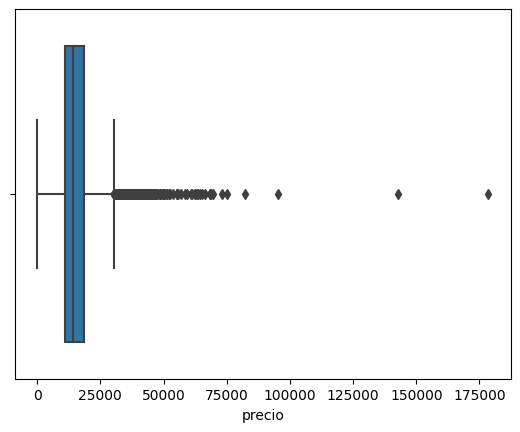

In [ ]:
sns.boxplot(x=bmw10['precio'])

In [ ]:
#El precio está afectado por una distribución de skewed, se recomienda normalizarlo para que siga una distribución normal
bmw10['log_precio'] = np.log10(bmw10['precio'])

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

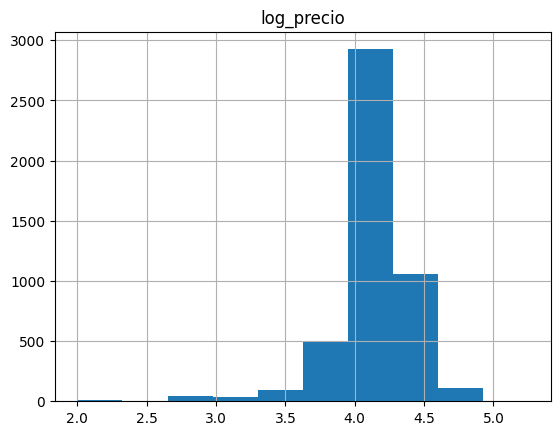

In [ ]:
bmw10.hist(column = 'log_precio')

<Axes: xlabel='log_precio'>

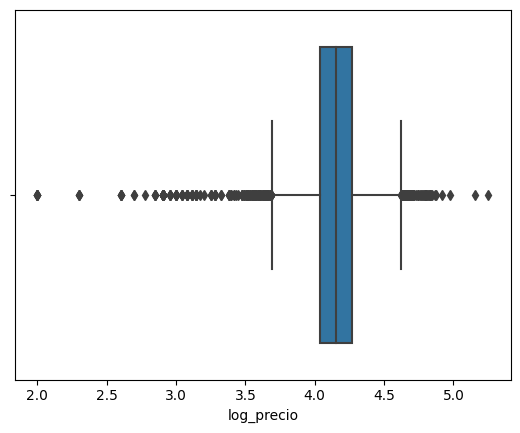

In [ ]:
sns.boxplot(x=bmw10['log_precio'])

**7.2. Eliminar variables con alta correlación o baja varianza**

In [ ]:
bmw10.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-77-940db737da26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bmw10.corr().style.background_gradient(cmap='coolwarm')


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,extras,dif_venta_reg,fecha_venta_mes,fecha_registro_mes,fecha_registro_año,log_precio
km,1.000000,-0.048021,0.065878,0.010972,0.004000,-0.050944,0.047984,-0.029749,0.154149,-0.039459,-0.408123,0.025775,0.506656,-0.001993,-0.018074,-0.507088,-0.436343
potencia,-0.048021,1.000000,0.327685,0.199494,0.313354,0.449270,0.341711,0.233720,0.007739,0.489829,0.638356,0.565507,-0.081844,-0.028989,-0.000167,0.080186,0.507147
volante_regulable,0.065878,0.327685,1.000000,0.308096,0.253798,0.232267,0.280942,0.134467,0.242536,0.223848,0.267953,0.629719,0.076706,0.079842,-0.035514,-0.067492,0.250591
aire_acondicionado,0.010972,0.199494,0.308096,1.000000,0.149940,0.149782,0.284220,0.134781,0.369704,0.224319,0.243870,0.573752,-0.229336,0.010623,0.012564,0.229755,0.339436
camara_trasera,0.004000,0.313354,0.253798,0.149940,1.000000,0.201148,0.199745,0.143013,0.060404,0.201965,0.251028,0.501688,0.024344,0.020058,0.027404,-0.025991,0.198207
asientos_traseros_plegables,-0.050944,0.449270,0.232267,0.149782,0.201148,1.000000,0.249821,0.155236,0.126311,0.278900,0.414938,0.540642,-0.054655,0.033600,-0.017245,0.059192,0.353283
elevalunas_electrico,0.047984,0.341711,0.280942,0.284220,0.199745,0.249821,1.000000,0.256785,0.201820,0.335487,0.260309,0.669138,-0.089308,-0.023714,-0.004402,0.088509,0.317409
bluetooth,-0.029749,0.233720,0.134467,0.134781,0.143013,0.155236,0.256785,1.000000,0.128511,0.122116,0.210653,0.472410,-0.072803,-0.011746,-0.003196,0.072681,0.205994
gps,0.154149,0.007739,0.242536,0.369704,0.060404,0.126311,0.201820,0.128511,1.000000,-0.062816,-0.008717,0.381998,0.076499,0.060899,-0.012346,-0.071147,0.042362
alerta_lim_velocidad,-0.039459,0.489829,0.223848,0.224319,0.201965,0.278900,0.335487,0.122116,-0.062816,1.000000,0.444105,0.581976,-0.182496,-0.042045,-0.002453,0.180623,0.419459


In [ ]:
bmw11 = bmw10.copy()

In [ ]:
# Eliminar 'fecha_registro_año', ya que correlaciona con 'diff_venta_reg':
bmw11.drop(columns=['fecha_registro_año'], inplace=True)

In [ ]:
# Eliminar 'fecha_registro_mes', ya que tiene muy poca varianza (correlación cercana a 0):
bmw11.drop(columns=['fecha_registro_mes', 'fecha_venta_mes'], inplace=True)

**7.3. Reescalar variables:**

In [ ]:
# Separar las variables en categorías: taget, categóricas, booleanas y numéricas

In [ ]:
target= ['precio', 'log_precio']

In [ ]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(bmw11)

In [ ]:
lista_numericas

['km', 'potencia', 'extras', 'dif_venta_reg']

In [ ]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [ ]:
lista_categoricas

['color',
 'tipo_coche',
 'fecha_venta_nombredia',
 'fecha_registro_nombredia',
 'modelo_1',
 'modelo_2']

In [ ]:
print(len(bmw11.columns), "total de variables")
print(len(target), "variable a predecir")
print(len(lista_categoricas), "variables categóricas")
print(len(lista_boolean), "variables boolean")
print(len(lista_numericas), "variables numéricas")

20 total de variables
2 variable a predecir
6 variables categóricas
8 variables boolean
4 variables numéricas


In [ ]:
bmw12 = bmw11.copy()

**Reescalar las variables numéricas:**

In [ ]:
def minmaxTransformacion(dataframe, variable_transformar):
   minMaxResultado = MinMaxScaler()
   dataframe[variable_transformar] = minMaxResultado.fit_transform(dataframe[variable_transformar].values.reshape(-1,1))
   return minMaxResultado

In [ ]:
for i in lista_numericas:
    globals()['minMax_'+ str(i)] = minmaxTransformacion(bmw12, i)

In [ ]:
bmw12.head()

,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,extras,dif_venta_reg,fecha_venta_nombredia,fecha_registro_nombredia,modelo_1,modelo_2,log_precio
0,0.140413,0.236407,black,convertible,1,1,0,0,1,1,1,0,11300.0,0.625,0.193767,Monday,Wednesday,118,None,4.053078
1,0.013987,0.749409,grey,convertible,1,1,0,0,0,1,1,1,69700.0,0.625,0.045405,Thursday,Friday,Otros_modelos,None,4.843233
2,0.183280,0.283688,white,convertible,0,0,0,0,1,0,1,0,10200.0,0.250,0.190879,Thursday,Sunday,320,None,4.008600
3,0.128043,0.319149,Otros_colores,convertible,1,1,0,0,1,1,1,1,25100.0,0.750,0.109131,Thursday,Tuesday,420,None,4.399674
4,0.097118,0.378251,silver,convertible,1,1,0,0,0,1,1,1,33400.0,0.625,0.099771,Sunday,Monday,Otros_modelos,None,4.523746


**Encoding de las variables categóricas:**

In [ ]:
bmw13 = pd.get_dummies(data=bmw12,
                               prefix=None, 
                               prefix_sep="_",
                               columns= lista_categoricas)

In [ ]:
bmw13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4777 entries, 0 to 4776
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   km                                  4777 non-null   float64
 1   potencia                            4777 non-null   float64
 2   volante_regulable                   4777 non-null   int64  
 3   aire_acondicionado                  4777 non-null   int64  
 4   camara_trasera                      4777 non-null   int64  
 5   asientos_traseros_plegables         4777 non-null   int64  
 6   elevalunas_electrico                4777 non-null   int64  
 7   bluetooth                           4777 non-null   int64  
 8   gps                                 4777 non-null   int64  
 9   alerta_lim_velocidad                4777 non-null   int64  
 10  precio                              4777 non-null   float64
 11  extras                              4777 no

In [ ]:
bmw13.corr().style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,extras,dif_venta_reg,log_precio,color_Otros_colores,color_black,color_blue,color_brown,color_grey,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,fecha_venta_nombredia_Friday,fecha_venta_nombredia_Monday,fecha_venta_nombredia_Saturday,fecha_venta_nombredia_Sunday,fecha_venta_nombredia_Thursday,fecha_venta_nombredia_Tuesday,fecha_venta_nombredia_Wednesday,fecha_registro_nombredia_Friday,fecha_registro_nombredia_Monday,fecha_registro_nombredia_Saturday,fecha_registro_nombredia_Sunday,fecha_registro_nombredia_Thursday,fecha_registro_nombredia_Tuesday,fecha_registro_nombredia_Wednesday,modelo_1_116,modelo_1_118,modelo_1_316,modelo_1_318,modelo_1_320,modelo_1_420,modelo_1_518,modelo_1_520,modelo_1_525,modelo_1_530,modelo_1_Otros_modelos,modelo_1_X1,modelo_1_X3,modelo_1_X5,modelo_1_X6,modelo_2_5,modelo_2_Active Tourer,modelo_2_Gran Coupé,modelo_2_Gran Tourer,modelo_2_Gran Turismo,modelo_2_M,modelo_2_M50
km,1.000000,-0.048021,0.065878,0.010972,0.004000,-0.050944,0.047984,-0.029749,0.154149,-0.039459,-0.408123,0.025775,0.506656,-0.436343,-0.013655,0.040150,-0.016827,-0.023429,0.027129,0.020100,-0.069022,-0.029813,-0.070831,0.178412,-0.110885,0.062823,-0.023060,-0.111951,-0.094426,0.004630,0.019317,-0.007987,0.012015,-0.008413,-0.016819,0.003138,0.003263,0.003240,-0.027403,0.003683,-0.024498,0.032288,0.008086,-0.108115,-0.014101,0.003877,0.059268,0.087492,-0.121477,0.029815,0.089796,0.098763,0.083806,-0.137602,-0.057237,-0.034026,-0.044126,-0.041947,-0.011149,-0.045790,-0.097090,-0.087418,0.003226,-0.046287,-0.022345
potencia,-0.048021,1.000000,0.327685,0.199494,0.313354,0.449270,0.341711,0.233720,0.007739,0.489829,0.638356,0.565507,-0.081844,0.507147,-0.014481,0.038588,-0.018443,-0.069070,0.003755,0.013813,0.010142,0.035371,0.127423,-0.051851,-0.227171,0.033747,-0.158654,0.236165,-0.054495,-0.031524,-0.011360,-0.022929,0.009263,0.006431,0.027531,0.001209,-0.026990,-0.031608,0.009847,0.012145,0.006942,0.017376,0.011898,-0.318283,-0.114690,-0.254434,-0.281854,-0.027059,0.011037,-0.079137,-0.016025,0.110578,0.284820,0.384006,-0.120414,0.043630,0.369126,0.243176,0.035507,-0.035199,0.119175,-0.043814,-0.014461,0.154452,0.096786
volante_regulable,0.065878,0.327685,1.000000,0.308096,0.253798,0.232267,0.280942,0.134467,0.242536,0.223848,0.267953,0.629719,0.076706,0.250591,-0.024437,0.018735,0.003902,0.043539,0.052508,-0.024410,-0.108804,0.054501,0.029054,-0.001656,-0.152758,0.054629,-0.106026,0.103406,-0.052920,0.019020,-0.024809,0.021566,-0.012261,-0.048540,0.017697,0.045114,-0.013229,-0.020143,-0.032930,0.007870,-0.001549,0.021920,0.039739,-0.194272,-0.121148,-0.133242,-0.107749,-0.093585,0.027989,0.063539,0.181277,0.093104,0.106515,0.086330,-0.098768,0.054212,0.155913,0.086552,0.013057,-0.029907,0.075017,-0.028937,-0.011799,0.059618,0.022621
aire_acondicionado,0.010972,0.199494,0.308096,1.000000,0.149940,0.149782,0.284220,0.134781,0.369704,0.224319,0.243870,0.573752,-0.229336,0.339436,-0.040999,0.033797,-0.002434,0.050028,0.026122,-0.044235,-0.069498,-0.045388,-0.035228,0.098745,-0.087172,0.051443,-0.149334,-0.012664,-0.003260,0.015043,-0.008509,0.002915,-0.025570,0.006800,0.004870,0.007964,-0.015585,0.000347,0.003873,-0.020453,0.018954,0.008349,0.005028,-0.161590,-0.098113,-0.038167,0.018569,-0.041567,0.009217,0.042413,0.146692,0.043887,0.079824,0.015714,-0.131572,-0.007654,0.089523,0.048336,0.007356,0.015658,0.044744,-0.001198,0.053539,0.036873,0.012744
camara_trasera,0.004000,0.313354,0.253798,0.149940,1.000000,0.201148,0.199745,0.143013,0.060404,0.201965,0.251028,0.501688,0.024344,0.198207,-0.031952,0.012752,0.001472,-0.013553,0.002752,-0.003009,0.004569,-0.044273,0.021694,-0.034616,-0.047509,-0.008185,-0.040576,0.111421,-0.024205,-0.015136,-0.010360,0.013825,

In [ ]:
bmw14 = bmw13.copy()

In [ ]:
# Eliminar 'fecha_venta_nombredia_i' y 'fecha_registro_nombredia_i' ya que tiene muy poca varianza (correlación cercana a 0):
cols_to_drop = bmw14.filter(like='_nombredia_').columns
bmw14.drop(columns=cols_to_drop, inplace=True)

In [ ]:
bmw14.corr().style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,extras,dif_venta_reg,log_precio,color_Otros_colores,color_black,color_blue,color_brown,color_grey,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,modelo_1_116,modelo_1_118,modelo_1_316,modelo_1_318,modelo_1_320,modelo_1_420,modelo_1_518,modelo_1_520,modelo_1_525,modelo_1_530,modelo_1_Otros_modelos,modelo_1_X1,modelo_1_X3,modelo_1_X5,modelo_1_X6,modelo_2_5,modelo_2_Active Tourer,modelo_2_Gran Coupé,modelo_2_Gran Tourer,modelo_2_Gran Turismo,modelo_2_M,modelo_2_M50
km,1.000000,-0.048021,0.065878,0.010972,0.004000,-0.050944,0.047984,-0.029749,0.154149,-0.039459,-0.408123,0.025775,0.506656,-0.436343,-0.013655,0.040150,-0.016827,-0.023429,0.027129,0.020100,-0.069022,-0.029813,-0.070831,0.178412,-0.110885,0.062823,-0.023060,-0.111951,-0.094426,-0.108115,-0.014101,0.003877,0.059268,0.087492,-0.121477,0.029815,0.089796,0.098763,0.083806,-0.137602,-0.057237,-0.034026,-0.044126,-0.041947,-0.011149,-0.045790,-0.097090,-0.087418,0.003226,-0.046287,-0.022345
potencia,-0.048021,1.000000,0.327685,0.199494,0.313354,0.449270,0.341711,0.233720,0.007739,0.489829,0.638356,0.565507,-0.081844,0.507147,-0.014481,0.038588,-0.018443,-0.069070,0.003755,0.013813,0.010142,0.035371,0.127423,-0.051851,-0.227171,0.033747,-0.158654,0.236165,-0.054495,-0.318283,-0.114690,-0.254434,-0.281854,-0.027059,0.011037,-0.079137,-0.016025,0.110578,0.284820,0.384006,-0.120414,0.043630,0.369126,0.243176,0.035507,-0.035199,0.119175,-0.043814,-0.014461,0.154452,0.096786
volante_regulable,0.065878,0.327685,1.000000,0.308096,0.253798,0.232267,0.280942,0.134467,0.242536,0.223848,0.267953,0.629719,0.076706,0.250591,-0.024437,0.018735,0.003902,0.043539,0.052508,-0.024410,-0.108804,0.054501,0.029054,-0.001656,-0.152758,0.054629,-0.106026,0.103406,-0.052920,-0.194272,-0.121148,-0.133242,-0.107749,-0.093585,0.027989,0.063539,0.181277,0.093104,0.106515,0.086330,-0.098768,0.054212,0.155913,0.086552,0.013057,-0.029907,0.075017,-0.028937,-0.011799,0.059618,0.022621
aire_acondicionado,0.010972,0.199494,0.308096,1.000000,0.149940,0.149782,0.284220,0.134781,0.369704,0.224319,0.243870,0.573752,-0.229336,0.339436,-0.040999,0.033797,-0.002434,0.050028,0.026122,-0.044235,-0.069498,-0.045388,-0.035228,0.098745,-0.087172,0.051443,-0.149334,-0.012664,-0.003260,-0.161590,-0.098113,-0.038167,0.018569,-0.041567,0.009217,0.042413,0.146692,0.043887,0.079824,0.015714,-0.131572,-0.007654,0.089523,0.048336,0.007356,0.015658,0.044744,-0.001198,0.053539,0.036873,0.012744
camara_trasera,0.004000,0.313354,0.253798,0.149940,1.000000,0.201148,0.199745,0.143013,0.060404,0.201965,0.251028,0.501688,0.024344,0.198207,-0.031952,0.012752,0.001472,-0.013553,0.002752,-0.003009,0.004569,-0.044273,0.021694,-0.034616,-0.047509,-0.008185,-0.040576,0.111421,-0.024205,-0.105054,-0.038456,-0.083933,-0.102111,-0.060116,-0.004005,0.002981,0.014170,0.058538,0.093387,0.106201,-0.027287,0.019391,0.157256,0.108009,-0.007280,-0.015227,0.051458,-0.007988,0.027068,0.086351,0.008199
asientos_traseros_plegables,-0.050944,0.449270,0.232267,0.149782,0.201148,1.000000,0.249821,0.155236,0.126311,0.278900,0.414938,0.540642,-0.054655,0.353283,0.002503,0.025349,-0.031053,-0.028843,-0.019536,0.056188,0.000858,-0.049387,-0.022662,-0.151449,-0.154107,-0.129020,-0.077959,0.492904,-0.040933,-0.142126,-0.087347,-0.112644,-0.184859,-0.113019,-0.016258,-0.059282,-0.138652,0.029303,0.113836,0.058688,0.016332,0.330710,0.346000,0.174187,-0.007247,-0.031650,0.034641,-0.027154,-0.034005,0.094097,0.029182
elevalunas_electrico,0.047984,0.341711,0.280942,0.284220,0.199745,0.249821,1.000000,0.256785,0.201820,0.335487,0.260309,0.669138,-0.089308,0.317409,-0.036818,0.076442,-0.036731,-0.030701,-0.012604,-0.035771,0.015328,0.007681,0.096822,0.044396,-0.096666,0.019368,-0.102551,0.0323

**Generar varias versiones del archivo:**
 - **versión completa**, con todo
 - **versión simplificada**, sin las variables 'extras' específicas ('volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps' y 'alerta_lim_velocidad'
 - **versión compleja**, sin la variable 'extras' pero con todas las demás

In [ ]:
bmw15 = bmw14.copy()

In [ ]:
# Versión simplificada:
bmw15.drop(columns=['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad'], inplace=True)
bmw15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4777 entries, 0 to 4776
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   km                      4777 non-null   float64
 1   potencia                4777 non-null   float64
 2   precio                  4777 non-null   float64
 3   extras                  4777 non-null   float64
 4   dif_venta_reg           4777 non-null   float64
 5   log_precio              4777 non-null   float64
 6   color_Otros_colores     4777 non-null   uint8  
 7   color_black             4777 non-null   uint8  
 8   color_blue              4777 non-null   uint8  
 9   color_brown             4777 non-null   uint8  
 10  color_grey              4777 non-null   uint8  
 11  color_silver            4777 non-null   uint8  
 12  color_white             4777 non-null   uint8  
 13  tipo_coche_convertible  4777 non-null   uint8  
 14  tipo_coche_coupe        4777 non-null   

In [ ]:
# Versión compleja: 
bmw16 = bmw14.copy()

In [ ]:
bmw16.drop(columns=['extras'], inplace=True)
bmw16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4777 entries, 0 to 4776
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4777 non-null   float64
 1   potencia                     4777 non-null   float64
 2   volante_regulable            4777 non-null   int64  
 3   aire_acondicionado           4777 non-null   int64  
 4   camara_trasera               4777 non-null   int64  
 5   asientos_traseros_plegables  4777 non-null   int64  
 6   elevalunas_electrico         4777 non-null   int64  
 7   bluetooth                    4777 non-null   int64  
 8   gps                          4777 non-null   int64  
 9   alerta_lim_velocidad         4777 non-null   int64  
 10  precio                       4777 non-null   float64
 11  dif_venta_reg                4777 non-null   float64
 12  log_precio                   4777 non-null   float64
 13  color_Otros_colore

In [ ]:
# Save to pickle:
bmw14.to_pickle('/content/drive/MyDrive/Data Science 2023 - NDS/03/Clases/Proyecto BMW/bmw_clean.csv')
bmw15.to_pickle('/content/drive/MyDrive/Data Science 2023 - NDS/03/Clases/Proyecto BMW/bmw_clean_simple.csv')
bmw16.to_pickle('/content/drive/MyDrive/Data Science 2023 - NDS/03/Clases/Proyecto BMW/bmw_clean_complex.csv')

In [ ]:
#Load pickle:
bmw_clean = pd.read_pickle('/content/drive/MyDrive/Data Science 2023 - NDS/03/Clases/Proyecto BMW/bmw_clean_complex.csv')

**Modelo de regresión para determinar el precio del coche a partir de las variables seleccionadas.**